# Tempora - Climate Analysis 

Himesh Dulal (20), Avipsa Parajuli (37), Aayusha Shrestha (50), Pratistha Thapa (57), Abhinav Lamsal (68)

## <b>Summary </b>
The project uses numerical methods like Interpolation, Linear Regression, Polynomial Fit + Extrapolation and Newton Raphson Method for analysis and predicting the climate data of data set provided as per csv.

## 1. Loading the CSV Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.sort_values(['Year', 'Month']).reset_index(drop=True)
    return df

In [2]:
def linear_interpolate_series(series):
    result = series.copy()
    for i in range(len(series)):
        if pd.isna(series[i]):
            # Find previous known value
            prev_index = i - 1
            while prev_index >= 0 and pd.isna(series[prev_index]):
                prev_index -= 1

            # Find next known value
            next_index = i + 1
            while next_index < len(series) and pd.isna(series[next_index]):
                next_index += 1

            if prev_index >= 0 and next_index < len(series):
                # Perform linear interpolation
                x0, y0 = prev_index, series[prev_index]
                x1, y1 = next_index, series[next_index]
                x = i
                result[i] = y0 + (x - x0) * (y1 - y0) / (x1 - x0)

    return result

In [3]:
def clean_data(df):
    print("Data with Missing Values:")
    print(df[['Year', 'Month', 'Temp_2m', 'Precip']][df['Temp_2m'].isna() | df['Precip'].isna()])

    cleaned_df = df.copy()

    cleaned_df['Temp_2m'] = linear_interpolate_series(cleaned_df['Temp_2m'])
    cleaned_df['Precip'] = linear_interpolate_series(cleaned_df['Precip'])

    print("\n After Cleaning:")
    print(cleaned_df[['Year', 'Month', 'Temp_2m', 'Precip']])

    # Plot before vs after
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df['Temp_2m'], label='Original Temp')
    plt.plot(cleaned_df['Temp_2m'], label='Cleaned Temp', linestyle='--')
    plt.title('Temperature - Before vs After Interpolation')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['Precip'], label='Original Rain')
    plt.plot(cleaned_df['Precip'], label='Cleaned Rain', linestyle='--')
    plt.title('Rainfall - Before vs After Interpolation')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return cleaned_df

Data with Missing Values:
     Year  Month    Temp_2m  Precip
6    2000      7        NaN  179.69
9    2000     10        NaN     NaN
15   2001      4        NaN    7.24
24   2002      1        NaN   13.65
28   2002      5  28.223226     NaN
30   2002      7  28.718065     NaN
40   2003      5  28.689355     NaN
45   2003     10        NaN   23.75
58   2004     11  17.193333     NaN
70   2005     11  16.501667     NaN
84   2007      1  13.198710     NaN
86   2007      3        NaN   33.50
88   2007      5  28.276774     NaN
91   2007      8  24.908387     NaN
93   2007     10        NaN   34.16
99   2008      4  25.978000     NaN
104  2008      9        NaN  220.39
107  2008     12  15.259032     NaN
109  2009      2        NaN    0.99
113  2009      6        NaN  122.74
114  2009      7        NaN  284.86
124  2010      5  28.999677     NaN
133  2011      2  16.187500     NaN
143  2011     12        NaN    0.60
152  2012      9        NaN  409.08
166  2013     11  17.132333     NaN
16

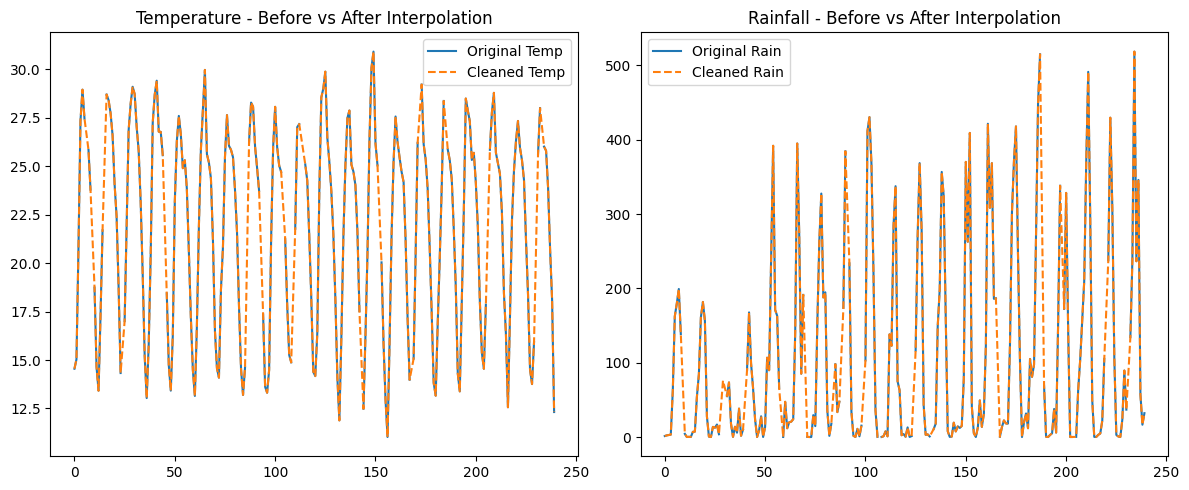

In [4]:
district= "Chitawan"
filepath=f"data/final_data/{district}.csv"
df= load_and_prepare_data(filepath)
cleaned_df = clean_data(df)

In [5]:
def visualize_trends(df):
    # Group by year
    yearly_df = df.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    plt.figure(figsize=(10, 5))

    plt.plot(yearly_df['Year'], yearly_df['Temp_2m'], color='orange', marker='o', label='Avg Temp (°C)')
    plt.plot(yearly_df['Year'], yearly_df['Precip'], color='blue', marker='s', label='Total Rainfall (mm)')

    plt.title('Climate Trends in Kathmandu (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


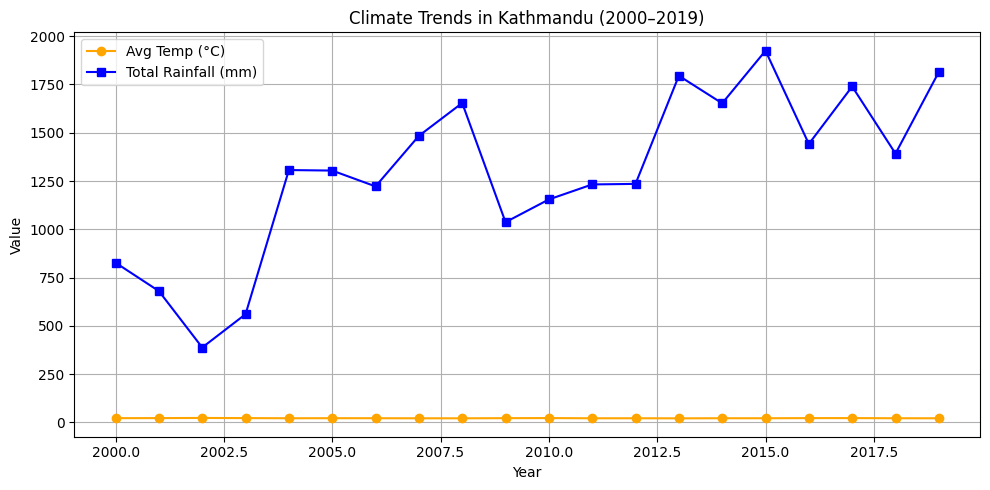

In [6]:
visualize_trends(cleaned_df)

In [7]:
def compare_trends_by_year(df_original, df_cleaned):
    # Group both datasets by year
    yearly_orig = df_original.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    yearly_cleaned = df_cleaned.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Temperature
    plt.subplot(1, 2, 1)
    plt.plot(yearly_orig['Year'], yearly_orig['Temp_2m'], label='Original Avg Temp', color='orange', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Temp_2m'], label='Interpolated Avg Temp', color='green', linestyle='--', marker='o')
    plt.title('Yearly Avg Temperature (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)

    # Rainfall
    plt.subplot(1, 2, 2)
    plt.plot(yearly_orig['Year'], yearly_orig['Precip'], label='Original Rainfall', color='blue', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Precip'], label='Interpolated Rainfall', color='purple', linestyle='--', marker='o')
    plt.title('Yearly Rainfall Totals (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


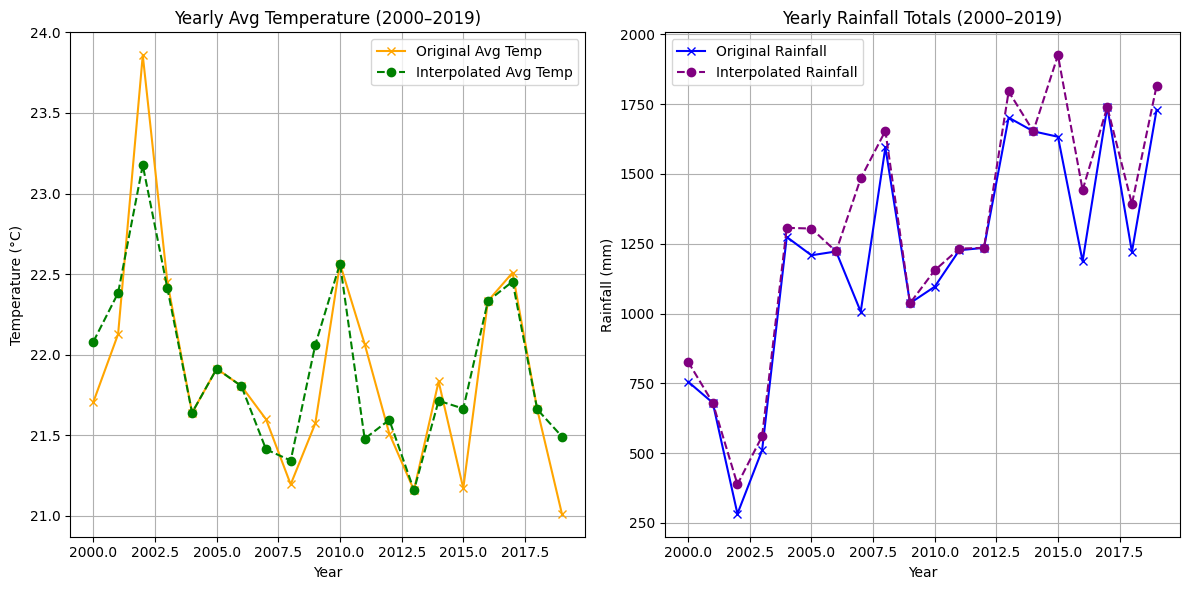

In [8]:
compare_trends_by_year(df, cleaned_df)